In [1]:
import numpy as np
import matplotlib.pyplot as plt

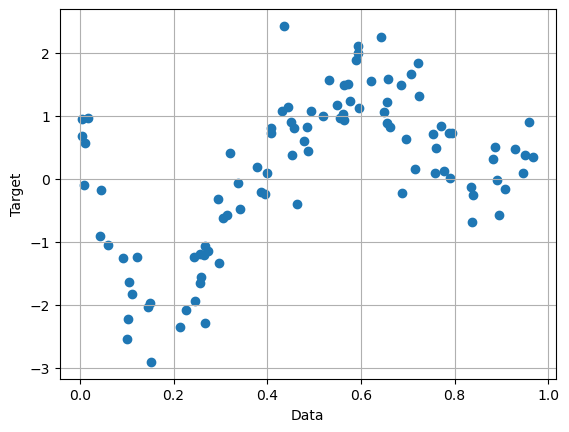

In [2]:
#データ数
n = 100
#データを生成するための関数の定義
def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z

data = np.random.rand(n).astype(np.float32)
data = np.sort(data) #データを小さい順に並び替え
target = true_func(data) #データに対応する正解データ

#ノイズを加える
target = target + 0.5 * np.random.randn(n)

#作成したデータをプロット
plt.scatter(data, target)
plt.ylabel('Target')
plt.xlabel('Data')
plt.grid()
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

[[0.        2.2473621]]
[[ 0.         6.4911537 -4.453821 ]]
[[  0.       -10.775525  41.094067 -31.634106]]
[[   0.        -45.248318  207.90341  -303.4642    141.09758 ]]
[[   0.        -46.499184  217.37024  -329.93512   172.06786   -12.83638 ]]
[[   0.        -50.757282  264.7225   -531.74817   569.64154  -378.10526
   126.65529 ]]
[[    0.        -43.18732   148.7728    155.89352 -1409.0851   2579.2932
  -2081.8076    651.1211 ]]
[[ 0.0000000e+00 -1.4438082e+01 -3.9817798e+02  4.2968125e+03
  -1.7260377e+04  3.6175562e+04 -4.2049477e+04  2.5633807e+04
  -6.3840332e+03]]
[[ 0.0000000e+00 -2.6607843e+01 -1.1175352e+02  1.5229399e+03
  -3.2789763e+03 -4.3130562e+03  2.7787539e+04 -4.5194484e+04
   3.2577217e+04 -8.9641113e+03]]
[[    0.        -22.65031  -208.16972  2501.5447  -8538.861   12316.352
  -4632.5474  -5863.674    3753.5256   2664.9417  -1971.6079 ]]


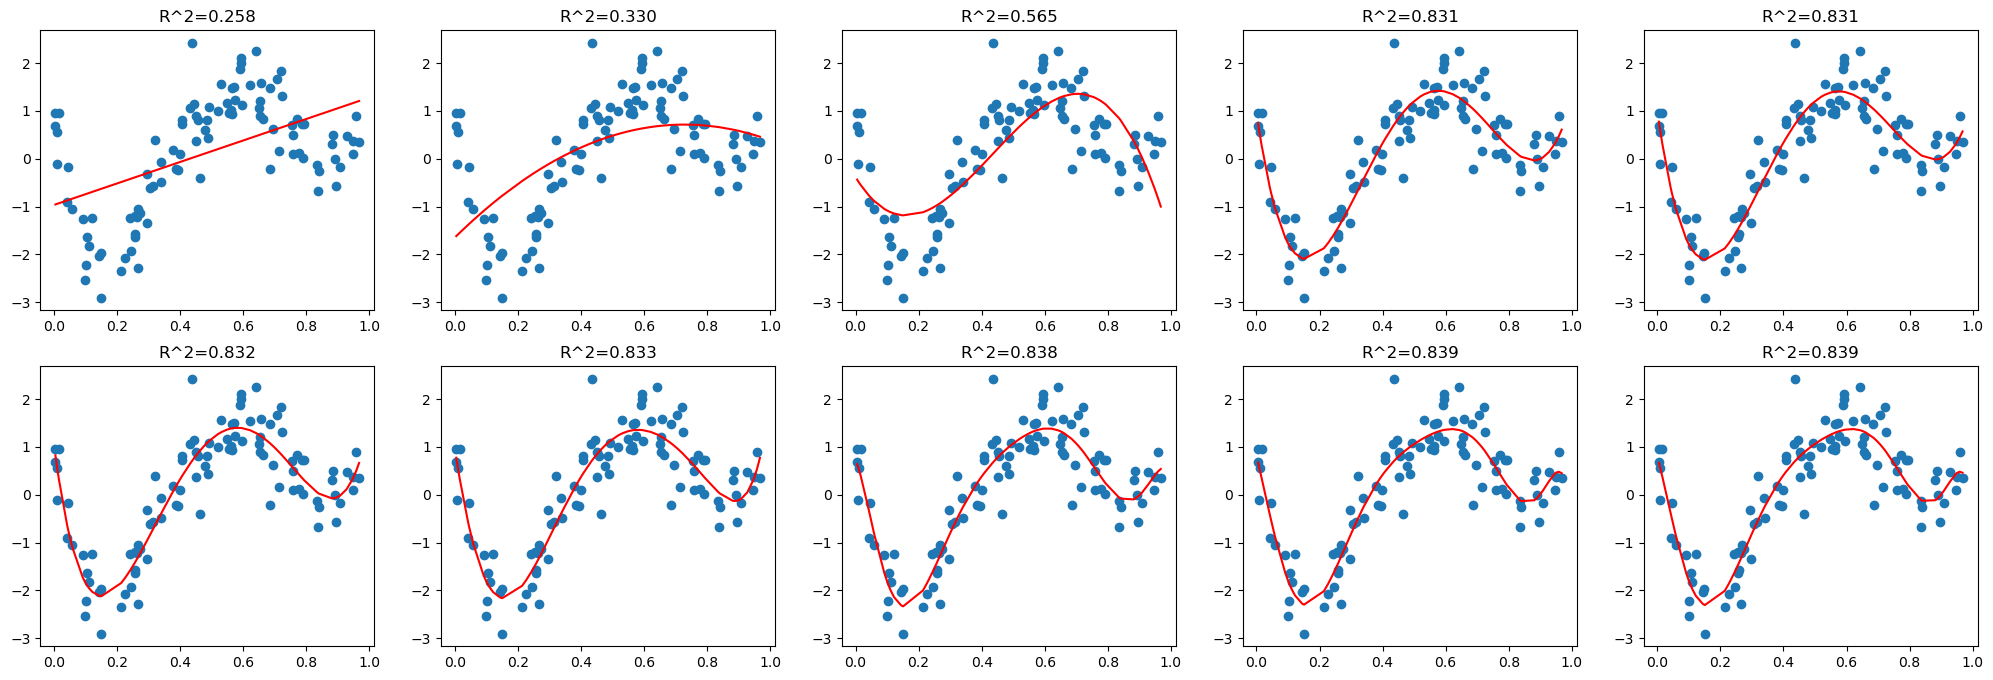

In [5]:
# データとターゲットをモデルに適した形状に変換する
data = data.reshape(-1,1)
target = target.reshape(-1,1)

# 次数の設定
deg = [1,2,3,4,5,6,7,8,9,10]

# 次数の数だけグラフを準備(2行5列のサブプロット)
fig, axes = plt.subplots(2, 5, figsize=(25,8))

# 非線形変換とパラメータ学習
for d in deg:
  # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
  # 多項式変換した後、線形回帰モデルでパラメータを学習
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression())
                   ])

  # モデルの学習
  regr.fit(data, target)
  print(regr.named_steps['linear'].coef_)

  # 学習モデルによる予測結果の算出
  p_poly = regr.predict(data)

  # グラフ作成(次数の数だけグラフ化)
  if d < 6:
    i, j = 0, d-1
  else:
    i, j = 1, d-6
  axes[i][j].scatter(data, target)
  axes[i][j].plot(data, p_poly, color='red') # 決定係数の算出
  axes[i][j].set_title('R^2={:.3f}'.format(regr.score(data, target)))

plt.show()